<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-March/blob/main/Decision_Tree/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
- Decision Tree is a supervised (labeled data) machine learning algorithm that can be used for both classification and regression problems.

- It’s similar to the Tree Data Structure, which has a root, and multiple other types of nodes (parent, child, and leaf).

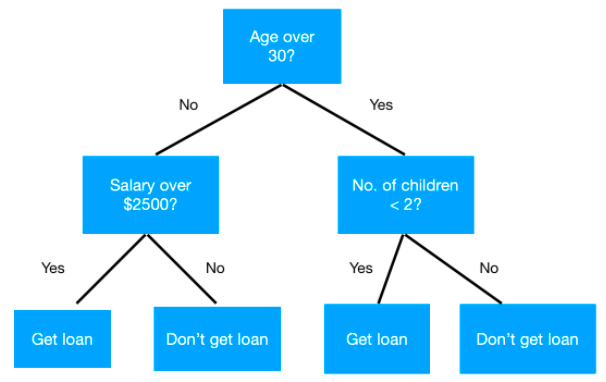

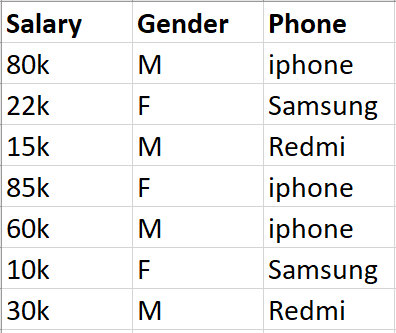

In [ ]:
if(salary > 50000):
  print("iphone")
else:
  if(gender == "M"):
    print("Redmi")
  else:
    print("Samsung")

# Why Decision Tree?
## Advantages
- They have high interpretability, which makes them the go-to algorithm for real-world business applications. They can be explained as a series of questions/ if-else statements.
- The time required to make predictions is very less. It’s just the evaluation of a particular set of conditions for a given data point.
- No missing value imputation is required as the algorithm adapts accordingly.

## Disadvantages
- They are unstable. A small change in data can lead to a vastly different decision tree.
- They are often relatively inaccurate and prone to overfitting. This can be rectified by replacing a single decision tree with a random forest of decision trees.

# Decision Tree on Categorical Data

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv("https://raw.githubusercontent.com/Pepcoders/Data-Science-March/main/Decision_Tree/play_tennis.csv")
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


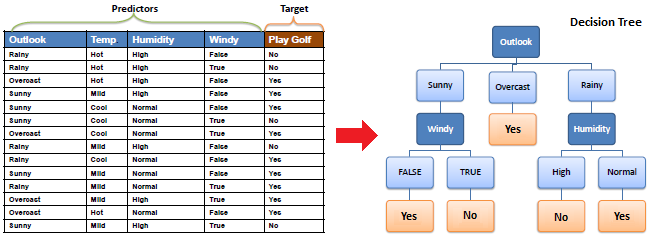

In [115]:
df.drop("day", inplace = True, axis = 1)

In [116]:
X = df.drop("play", axis = 1)
y = df["play"]

In [117]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [118]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
X = ordinal.fit_transform(X)
X

array([[2., 1., 0., 1.],
       [2., 1., 0., 0.],
       [0., 1., 0., 1.],
       [1., 2., 0., 1.],
       [1., 0., 1., 1.],
       [1., 0., 1., 0.],
       [0., 0., 1., 0.],
       [2., 2., 0., 1.],
       [2., 0., 1., 1.],
       [1., 2., 1., 1.],
       [2., 2., 1., 0.],
       [0., 2., 0., 0.],
       [0., 1., 1., 1.],
       [1., 2., 0., 0.]])

In [119]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

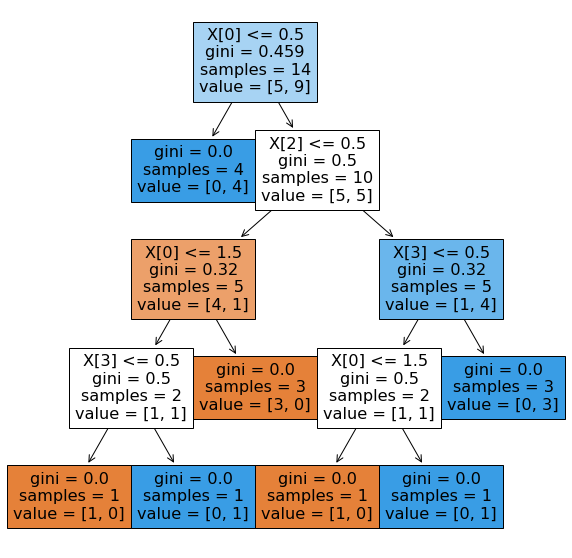

In [120]:
from sklearn import tree
plt.figure(figsize = (10, 10))

tree.plot_tree(model, filled = True)
plt.show()

# Decision Tree on Numerical Data

In [121]:
iris = pd.read_csv('https://raw.githubusercontent.com/Pepcoders/Data-Science-March/main/Decision_Tree/iris.csv')

In [122]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


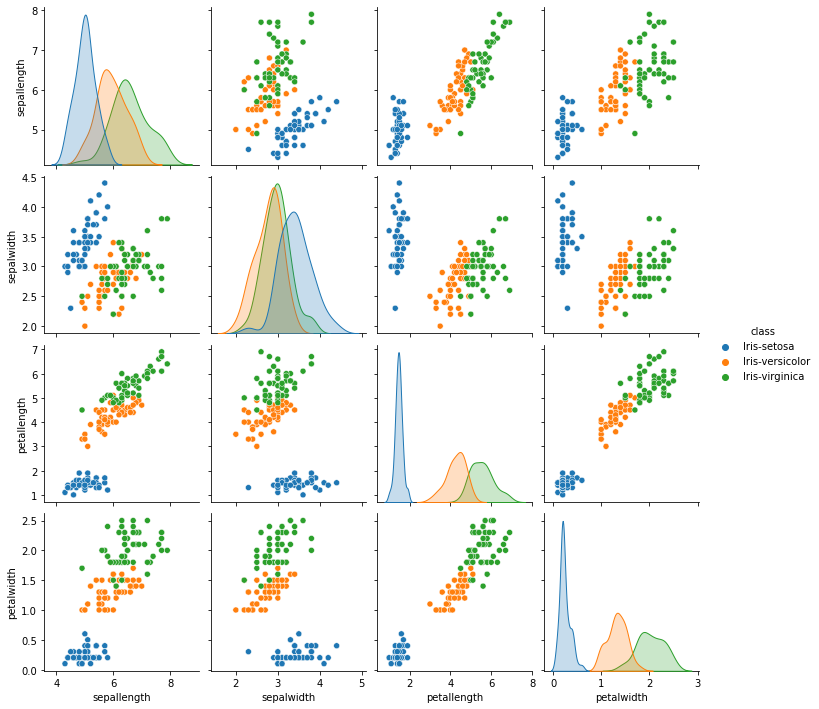

In [123]:
sns.pairplot(data = iris, hue = "class")

In [124]:
iris = iris[["sepallength", "petallength", "class"]]
iris.sample(5)

,sepallength,petallength,class
67,5.8,4.1,Iris-versicolor
124,6.7,5.7,Iris-virginica
26,5.0,1.6,Iris-setosa
138,6.0,4.8,Iris-virginica
9,4.9,1.5,Iris-setosa


In [125]:
X = iris.drop("class", axis = 1).values
y = iris["class"]

In [126]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

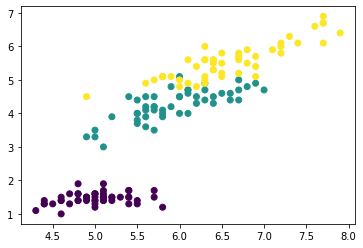

In [127]:
plt.scatter(X[:, 0], X[:,1], c = y)

In [128]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

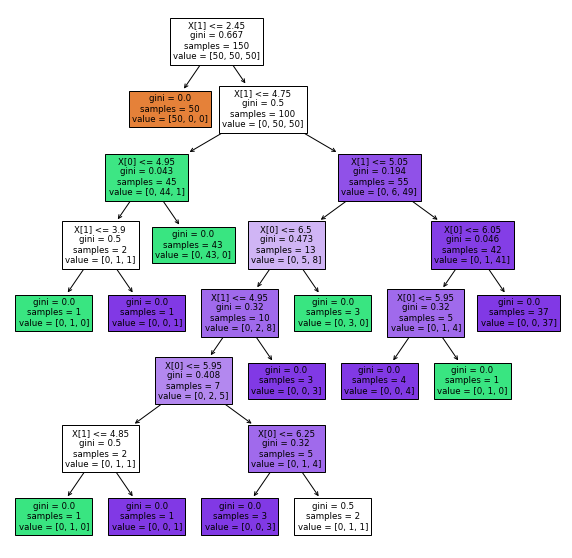

In [129]:
from sklearn import tree
plt.figure(figsize = (10, 10))

tree.plot_tree(model, filled = True)
plt.show()

In [138]:
def draw_surface(X, y, depth = None):

  model = DecisionTreeClassifier(max_depth= depth)
  model.fit(X, y)
  
  a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
  b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)

  XX,YY=np.meshgrid(a,b)

  data = np.array([XX.ravel(),YY.ravel()]).T
  labels = model.predict(data)

  plt.contourf(XX,YY,labels.reshape(XX.shape), alpha=0.7)
  plt.scatter(X[:,0],X[:,1], c=y)

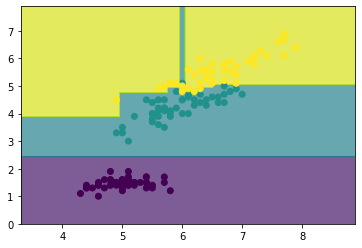

In [139]:
draw_surface(X, y)

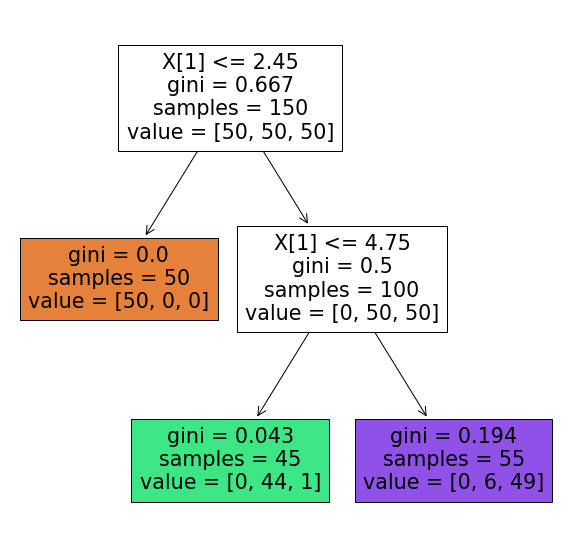

In [133]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X, y)

plt.figure(figsize = (10, 10))

tree.plot_tree(model, filled = True)
plt.show()

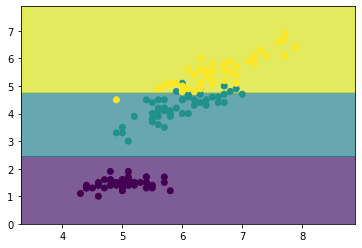

In [140]:
draw_surface(X, y, 2)

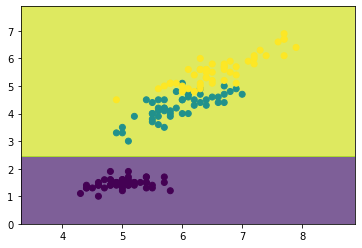

In [141]:
draw_surface(X, y, 1)

In [142]:
!pip install dtreeviz

In [143]:
import graphviz.backend as be
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


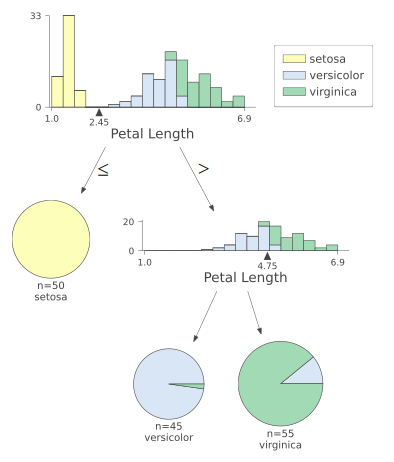

In [144]:
viz = dtreeviz(model, 
               X,
               y,
               feature_names=["sepal Lenght", "Petal Length"], 
               class_names=["setosa", "versicolor", "virginica"],
               scale = 1.5)
viz

In [145]:
model = tree.DecisionTreeClassifier()  
iris = load_iris()

X_train = iris.data
y_train = iris.target
model.fit(X_train, y_train)

DecisionTreeClassifier()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


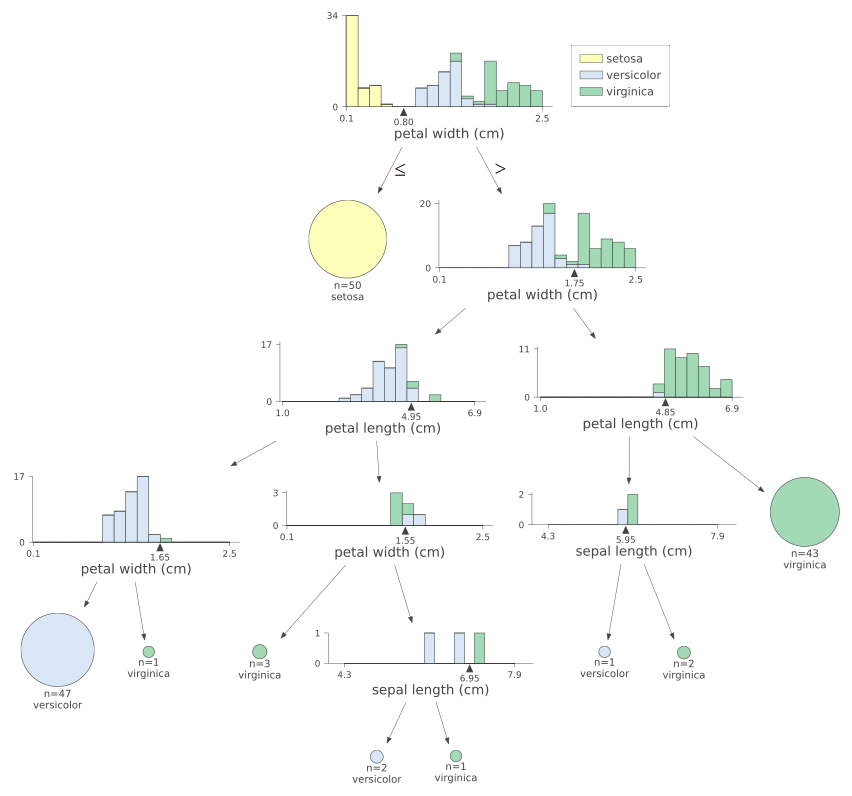

In [146]:
viz = dtreeviz(model, 
               X_train,
               y_train,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"],
               scale = 1.5)
viz

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


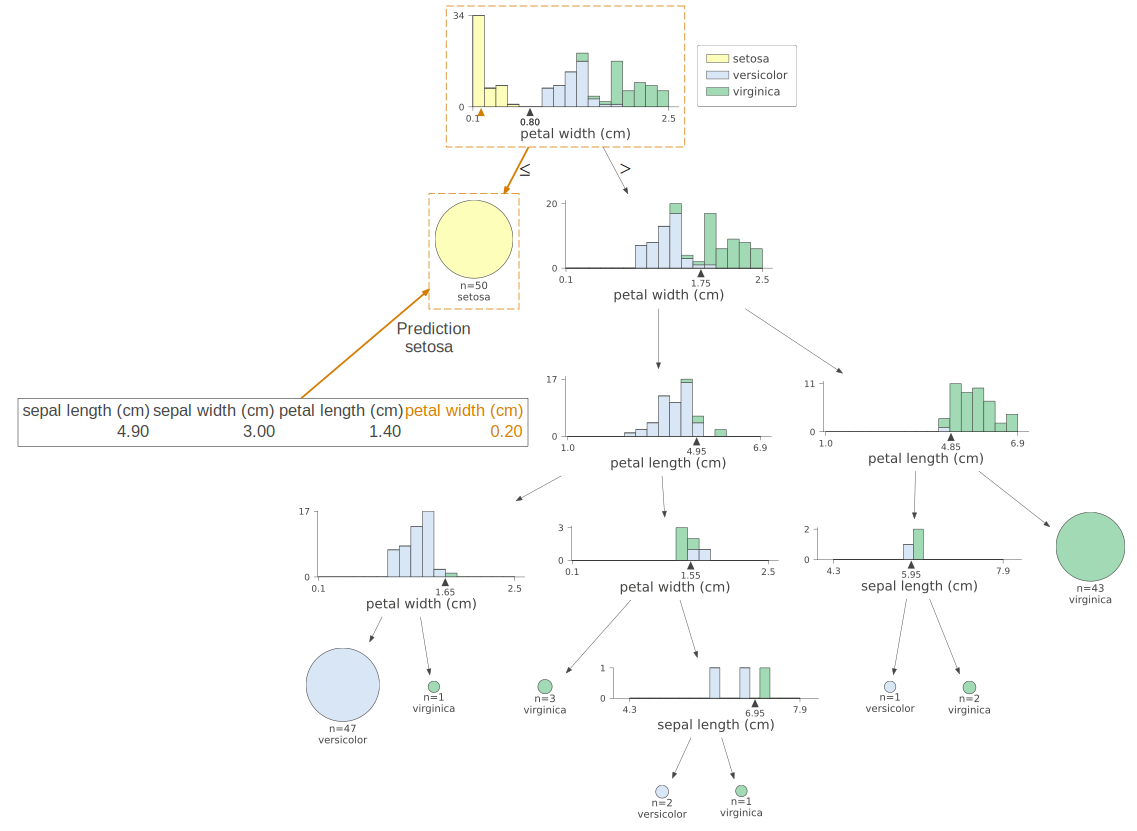

In [147]:
sample = np.random.randint(0, len(iris.data))
X = iris.data[sample,:]

viz = dtreeviz(model, 
               X_train,
               y_train,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               scale = 1.5,
               X=X)
viz

# Entropy vs Gini

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log2
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


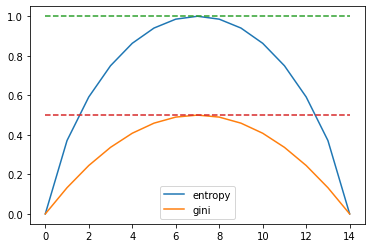

In [155]:
x1 = np.linspace(0, 1, 15)
x2 = 1-x1

ye = -x1*np.log2(x1) - x2*np.log2(x2)
yg = 1 - (x1*x1 + x2*x2)

ye[0] = 0  # p(x1) = 0
ye[-1] = 0 # p(x2) = 0

plt.plot(ye, label = 'entropy')
plt.plot(yg, label = 'gini')

plt.plot([0, 14], [1, 1], "--")
plt.plot([0, 14], [0.5, 0.5], "--")
plt.legend()